# **Modelling and Evaluation**

### Objectives

* Answer Business Requirement 2:
    * The client is interested in a ML system capable of predicting whether a cherry leaf is healthy or contains powdery mildew.

### Inputs

* inputs/cherry_leaves/cherry-leaves/train
* inputs/cherry_leaves/cherry-leaves/validation
* inputs/cherry_leaves/cherry-leaves/test
* image shape embeddings
* label distribution plot and frequency

### Outputs

* Image augmentation
* Class indices to change prediction inference in labels
* ML model creation and training
* Learning curve plot for model performance
* Model evaluation on pickle file
* Prediction on random image file

### Additional Comments

* No additional comments



---

## **Change working directory**

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/milestone-project-mildew-detection-in-cherry-leaves/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/milestone-project-mildew-detection-in-cherry-leaves'

## **Set the Input and Output directories**

### Set the input directories

Create variables for the data directory path and its subfolders paths 

In [4]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/02%20-%20DataVisualization.ipynb

my_data_dir = '/workspace/milestone-project-mildew-detection-in-cherry-leaves/inputs/cherry_leaves/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set the output directories

Create folders and subfolders for storing the results of the research

In [5]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/02%20-%20DataVisualization.ipynb

version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## **Import the necessary libraries**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

### Get the Labels in the training set

In [7]:
label_list = os.listdir(train_path)
print(f'Labels: {label_list}')

Labels: ['healthy', 'powdery_mildew']


### Load the image shape embeddings

In [10]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/SamSswi/WalkthroughProject01DataAnalytics/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(100, 100, 3)

### Load the label frequency

Load the label frequency to know the number of images in every data set.

In [11]:
df_freq = joblib.load(filename=f"outputs/{version}/label_dist_freq_df.pkl")
df_freq

,Set,Label,Frequency
0,test,healthy,422
1,test,powdery_mildew,422
2,train,healthy,1472
3,train,powdery_mildew,1472
4,validation,healthy,210
5,validation,powdery_mildew,210


### Load the label distribution plot

Load the label distribution plot to observe if there's any data imbalance and to observe how the images are distributed between the test, validation, and training sets.

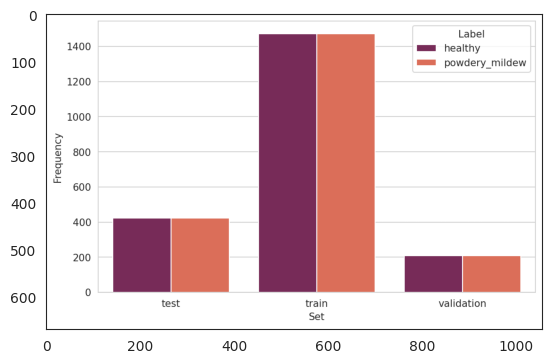

In [12]:
dist_plot = imread(f"outputs/{version}/labels_distribution_plot.png")
plt.imshow(dist_plot)
plt.show()

---

## **Image Augmentation**

* ### ImageDataGenerator

In [13]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb
from tensorflow.keras.preprocessing.image import ImageDataGenerator

* ### Initialize ImageDataGenerator

In [14]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

* ### Augment the training set

In [15]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

batch_size = 28  # Set batch size, number of samples processed at each iteration
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='categorical',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

* ### Augment the validation set images

In [16]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='categorical',
                                                                        shuffle=False)

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

* ### Augment the test set images

In [17]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='categorical',
                                                                        shuffle=False)

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Plot augmented training image

(28, 100, 100, 3)


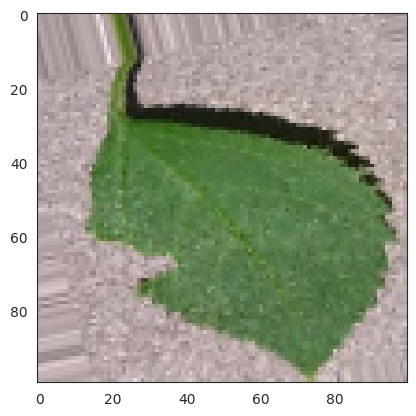

(28, 100, 100, 3)


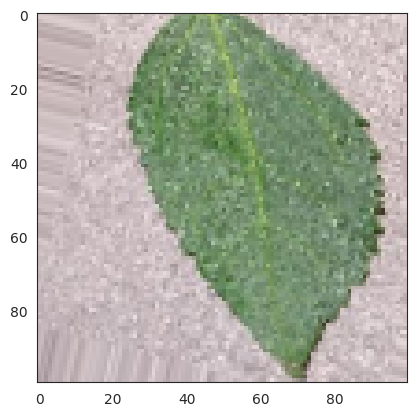

(28, 100, 100, 3)


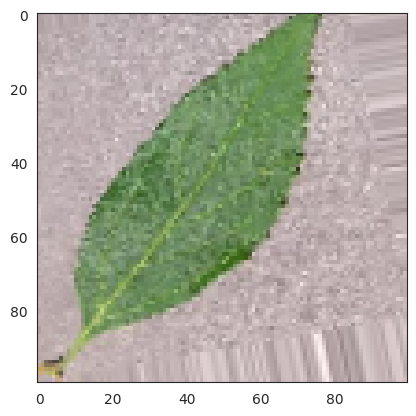

In [18]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

for _ in range(3):
    img, label = train_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Plot augmented validation image

(28, 100, 100, 3)


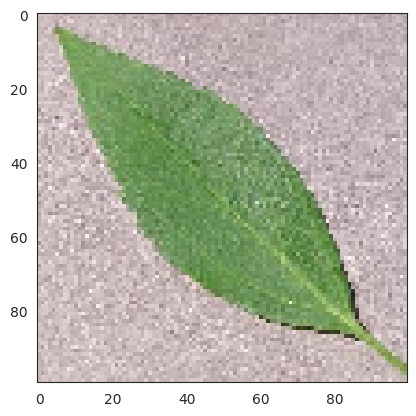

(28, 100, 100, 3)


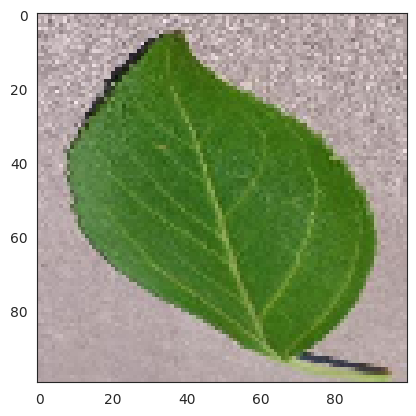

(28, 100, 100, 3)


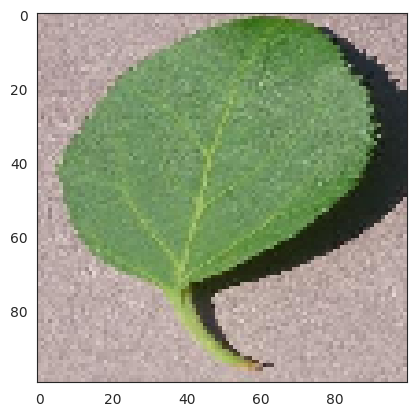

In [19]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Plot augmented test image

(28, 100, 100, 3)


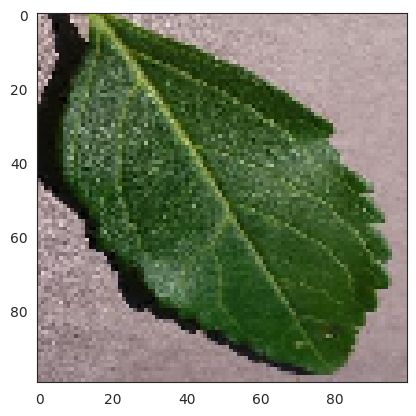

(28, 100, 100, 3)


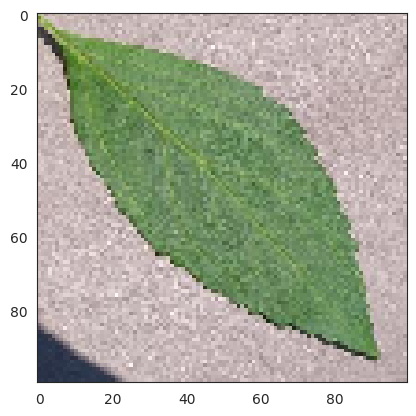

(28, 100, 100, 3)


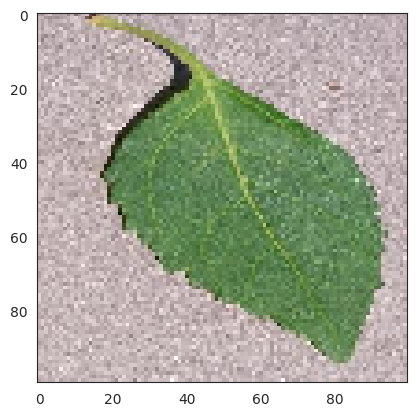

In [20]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

for _ in range(3):
    img, label = test_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Save class_indices

In [21]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

joblib.dump(value=train_set.class_indices, filename=f'{file_path}/class_indices.pkl')

['outputs/v1/class_indices.pkl']

## **Model Creation**


### Import Model Packages

In [22]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

### Model


* The idea to create a function - https://learn.codeinstitute.net/courses/course-v1:code_institute+CI_DA_ML+2021_Q4/courseware/1f851533cd6a4dcd8a280fd9f37ef4e2/81c19e89e4e94690bd58f738cb7eae91/?child=last

* model = Sequential() because it's a linear stack of layers and various types of layers can be added one after another - https://learn.codeinstitute.net/courses/course-v1:code_institute+CI_DA_ML+2021_Q4/courseware/1f851533cd6a4dcd8a280fd9f37ef4e2/81c19e89e4e94690bd58f738cb7eae91/?child=last

First Convolution Layer

* filters = 32 for the first convolution layer as recommended - https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

* kernel_size=(3,3) because the image size is lower than 128x128 as suggested here - https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

* relu activation because it doesn't activate all the neurons at the same time - https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/

Pooling layer 2x2 to avoid the loss of data - https://stackoverflow.com/questions/71255862/why-do-we-use-maxpooling-2x2-can-we-use-any-other-size-like-3x3-or-5x5-and-how#:~:text=Often%20times%2C%20applying%20a%20MaxPooling2D,a%20better%20option%20to%20choose.

Second Convolution Layer 
because when using only one layer, the results weren't consistent during test runs I decided to use a second layer with 64 filters. The increment was suggested here - https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

Flatten Layer - The Flatten layer is used to flatten the matrix into a vector, which means a single list of all values. Then that is fed into a dense layer. - https://learn.codeinstitute.net/courses/course-v1:code_institute+CI_DA_ML+2021_Q4/courseware/1f851533cd6a4dcd8a280fd9f37ef4e2/81c19e89e4e94690bd58f738cb7eae91/

Dense Layer

* 128 neurons - in the Image Classification Unit, it was suggested 128 is a good starting point. The model learned well with 128 neurons - https://learn.codeinstitute.net/courses/course-v1:code_institute+CI_DA_ML+2021_Q4/courseware/1f851533cd6a4dcd8a280fd9f37ef4e2/81c19e89e4e94690bd58f738cb7eae91/

* relu activation because it doesn't activate all the neurons at the same time - https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/

Output Layer
* number of layers is equal to the number of categories in the datasets - https://learn.codeinstitute.net/courses/course-v1:code_institute+CI_DA_ML+2021_Q4/courseware/1f851533cd6a4dcd8a280fd9f37ef4e2/81c19e89e4e94690bd58f738cb7eae91/

* softmax activation because the probabilities sum will be always 1. This is good for increasing the likelihood of one class. - https://medium.com/arteos-ai/the-differences-between-sigmoid-and-softmax-activation-function-12adee8cf322#:~:text=Softmax%20is%20used%20for%20multi,in%20the%20Logistic%20Regression%20model.

* to compile the model I used categorical_crossentropy for the loss function, arranged to monitor the metric accuracy and set the optimizer to rmsprop as recommended in the Model Training video of the Malaria detection walkthrough project - https://learn.codeinstitute.net/courses/course-v1:code_institute+CI_DA_ML+2021_Q4/courseware/07a3964f7a72407ea3e073542a2955bd/29ae4b4c67ed45a8a97bb9f4dcfa714b/



In [39]:
# The inspiration and general idea of building this Keras Model was taken from Code Institute's Course on Data Analytics Packages > ML: TensorFlow > TensorFlow Unit 10: Image Classification
# https://learn.codeinstitute.net/courses/course-v1:code_institute+CI_DA_ML+2021_Q4/courseware/1f851533cd6a4dcd8a280fd9f37ef4e2/81c19e89e4e94690bd58f738cb7eae91/?child=last
def create_tf_model(input_shape, n_labels):
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))

    model.add(Dense(n_labels, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    return model



Visualizing network structure

In [40]:
# This snippet of code was adapted from Code Institute's Course on Data Analytics Packages > ML: TensorFlow > TensorFlow Unit 10: Image Classification
# https://learn.codeinstitute.net/courses/course-v1:code_institute+CI_DA_ML+2021_Q4/courseware/1f851533cd6a4dcd8a280fd9f37ef4e2/81c19e89e4e94690bd58f738cb7eae91/?child=last

n_labels = len(label_list)
model = create_tf_model(input_shape=image_shape, n_labels=n_labels)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4333696   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

### Early Stopping

In [41]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=7)

## **Fit the model for model training**

In [42]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

model.fit(train_set,
          epochs=30,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

Epoch 1/30
105/105 [==============================] - 20s 181ms/step - loss: 0.4772 - accuracy: 0.7980 - val_loss: 0.4010 - val_accuracy: 0.8524
Epoch 2/30
105/105 [==============================] - 12s 118ms/step - loss: 0.1892 - accuracy: 0.9390 - val_loss: 0.0904 - val_accuracy: 0.9810
Epoch 3/30
105/105 [==============================] - 13s 119ms/step - loss: 0.1088 - accuracy: 0.9636 - val_loss: 0.0693 - val_accuracy: 0.9905
Epoch 4/30
105/105 [==============================] - 12s 116ms/step - loss: 0.0894 - accuracy: 0.9750 - val_loss: 0.0477 - val_accuracy: 0.9929
Epoch 5/30
105/105 [==============================] - 12s 113ms/step - loss: 0.0571 - accuracy: 0.9825 - val_loss: 0.0351 - val_accuracy: 0.9905
Epoch 6/30
105/105 [==============================] - 12s 116ms/step - loss: 0.0738 - accuracy: 0.9825 - val_loss: 0.0479 - val_accuracy: 0.9905
Epoch 7/30
105/105 [==============================] - 12s 116ms/step - loss: 0.0386 - accuracy: 0.9859 - val_loss: 0.0472 - val_ac

### Save Model

In [44]:

# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

model.save(f'{file_path}/cherry_mildew_detector_model.h5')

## **Model perfromance**

### Model Learning Curve

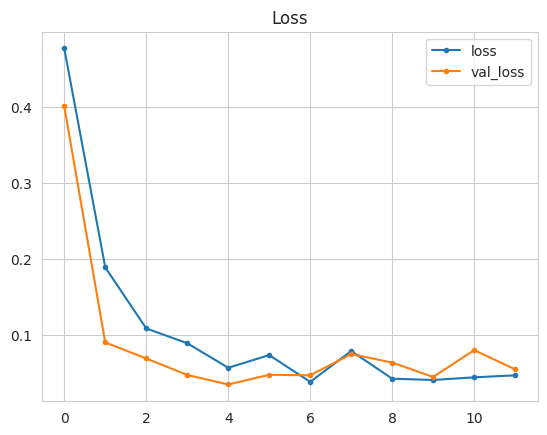

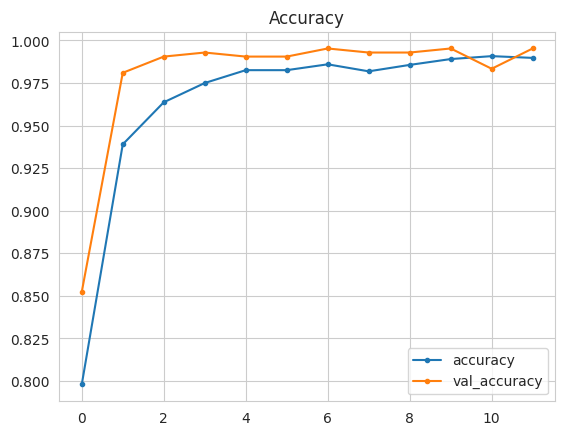

In [43]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()

---

## **Model Evaluation**

Load saved model

In [45]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

from keras.models import load_model
model = load_model(f'{file_path}/cherry_mildew_detector_model.h5')

Evaluate the Model on the test set

In [46]:
# This snippet of code was adapted from Code Institute's Course on Data Analytics Packages > ML: TensorFlow > TensorFlow Unit 10: Image Classification
# https://learn.codeinstitute.net/courses/course-v1:code_institute+CI_DA_ML+2021_Q4/courseware/1f851533cd6a4dcd8a280fd9f37ef4e2/81c19e89e4e94690bd58f738cb7eae91/?child=last

evaluation = model.evaluate(test_set)

31/31 [==============================] - 2s 73ms/step - loss: 0.0203 - accuracy: 0.9976


### Save evaluation as a pkl file

In [47]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

joblib.dump(value=evaluation, filename=f'{file_path}/model_evaluation.pkl')

['outputs/v1/model_evaluation.pkl']

## **Predict on new data**

Predict on one sample image from the test set. (Unknown data)

Load a random image

['healthy', 'powdery_mildew']
255
powdery_mildew
Image shape: (100, 100), Image mode: RGB


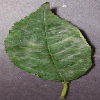

In [58]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb
from tensorflow.keras.preprocessing import image
import random
print(label_list)
index = random.randint(1, 422)
print(index)
p_label = label_list[1]
print(p_label)
p_image = image.load_img(f"{test_path}/{p_label}/{os.listdir(test_path+'/'+p_label)[index]}", target_size=image_shape, color_mode='rgb')
print(f'Image shape: {p_image.size}, Image mode: {p_image.mode}')
p_image

Convert image to array

In [59]:
# This code snippet was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb

arr_image = image.img_to_array(p_image)
arr_image = np.expand_dims(arr_image, axis=0)/255
print(arr_image.shape)

(1, 100, 100, 3)


Predict class probabilities

In [60]:
pred_probs = model.predict(arr_image)[0]
# The usage of the argmax function was inspired from Numpy documentation
# https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
pred_class_index = np.argmax(pred_probs)
pred_proba = pred_probs[pred_class_index]

# The code snippet below was adapted from Code Institue Malaria Detector Walkthrough Sample Project
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb
target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_class_index]

print(pred_proba)
print(pred_class)

0.9999999
powdery_mildew


---

# Conclusions and Next Steps

## Conclusions

* The Image dataset was augmented to satisfy a CNN's demand for a large number of images.
* The model was trained and tuned using a deep-learning Convolutional Neural Network.
* The model's performace was evaluated on new data and it satisfied the clients demands for accuracy.
* The model and the model evaluation were saved as a pickle file
* The model predicted well on random cherry leaf samples.

## Next Steps

* Build a dashboard where the client can interact with the model.